In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack, hstack
import fitsio
# from astropy.io import fits

from scipy.ndimage.filters import gaussian_filter

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

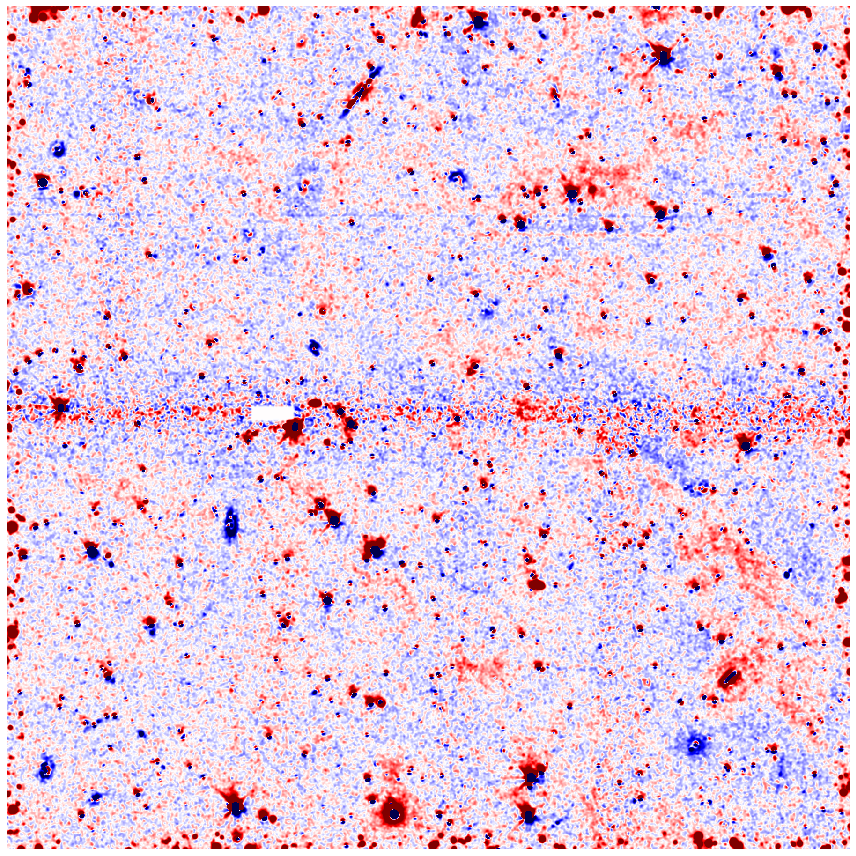

In [3]:
img = fitsio.read('/Users/rongpu/Downloads/template/dr9f/legacysurvey-2655p177-image-g.fits.fz')
model = fitsio.read('/Users/rongpu/Downloads/template/dr9f/legacysurvey-2655p177-model-g.fits.fz')
img = img - model

# downsize
binsize = 2
trim_size_x = img.shape[1] % binsize
trim_size_y = img.shape[0] % binsize
img = img[:(img.shape[0]-trim_size_y), :(img.shape[1]-trim_size_x)]
# to ignore NAN values, use np.nanmean
img = np.nanmean(np.nanmean(img.reshape((img.shape[0]//binsize, binsize, img.shape[1]//binsize,-1)), axis=3), axis=1)

# Gaussian filtering
img = gaussian_filter(img, 2, mode='reflect')

plt.figure(figsize=(12, 12))
plt.imshow(img, vmin=-0.002, vmax=0.002, cmap='seismic')
plt.axis('off')
plt.tight_layout()
plt.savefig('/Users/rongpu/Downloads/coadd/residual_g_dr9f.png')
plt.show()

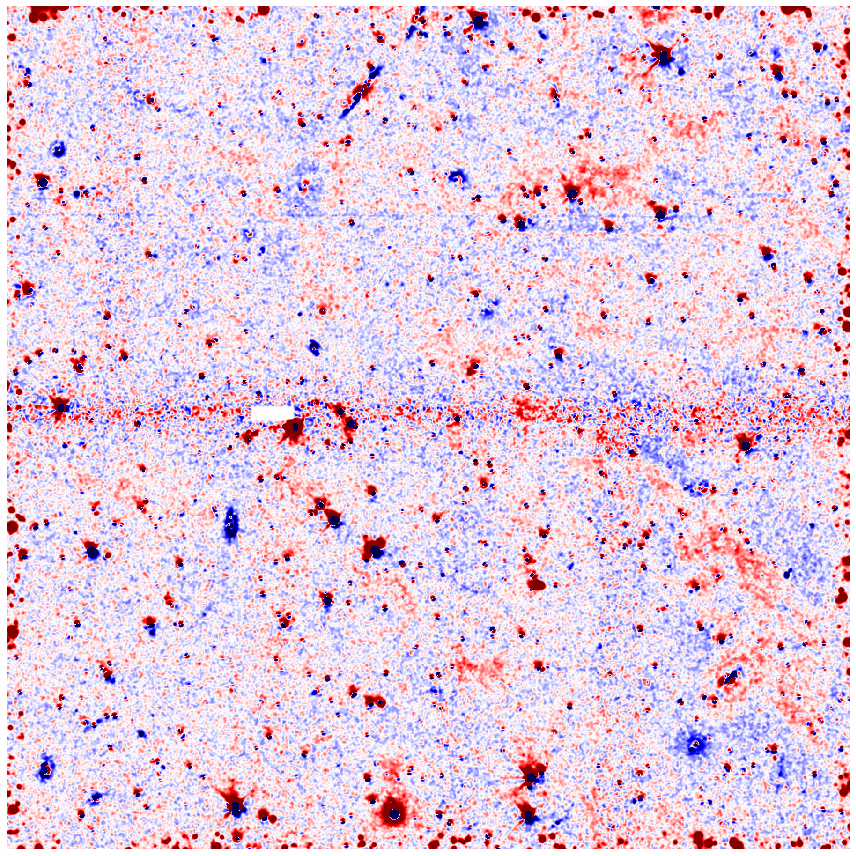

In [4]:
img = fitsio.read('/Users/rongpu/Downloads/template/new/legacysurvey-2655p177-image-g.fits.fz')
model = fitsio.read('/Users/rongpu/Downloads/template/new/legacysurvey-2655p177-model-g.fits.fz')
img = img - model

# downsize
binsize = 2
trim_size_x = img.shape[1] % binsize
trim_size_y = img.shape[0] % binsize
img = img[:(img.shape[0]-trim_size_y), :(img.shape[1]-trim_size_x)]
# to ignore NAN values, use np.nanmean
img = np.nanmean(np.nanmean(img.reshape((img.shape[0]//binsize, binsize, img.shape[1]//binsize,-1)), axis=3), axis=1)

# Gaussian filtering
img = gaussian_filter(img, 2, mode='reflect')

plt.figure(figsize=(12, 12))
plt.imshow(img, vmin=-0.002, vmax=0.002, cmap='seismic')
plt.axis('off')
plt.tight_layout()
plt.savefig('/Users/rongpu/Downloads/coadd/residual_g_new.png')
plt.show()

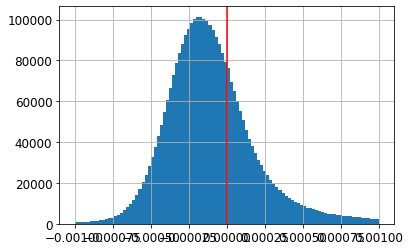

In [12]:
plt.hist(img.flatten(), 100, range=(-1e-3, 1e-3))
plt.axvline(0, color='r')
plt.grid()

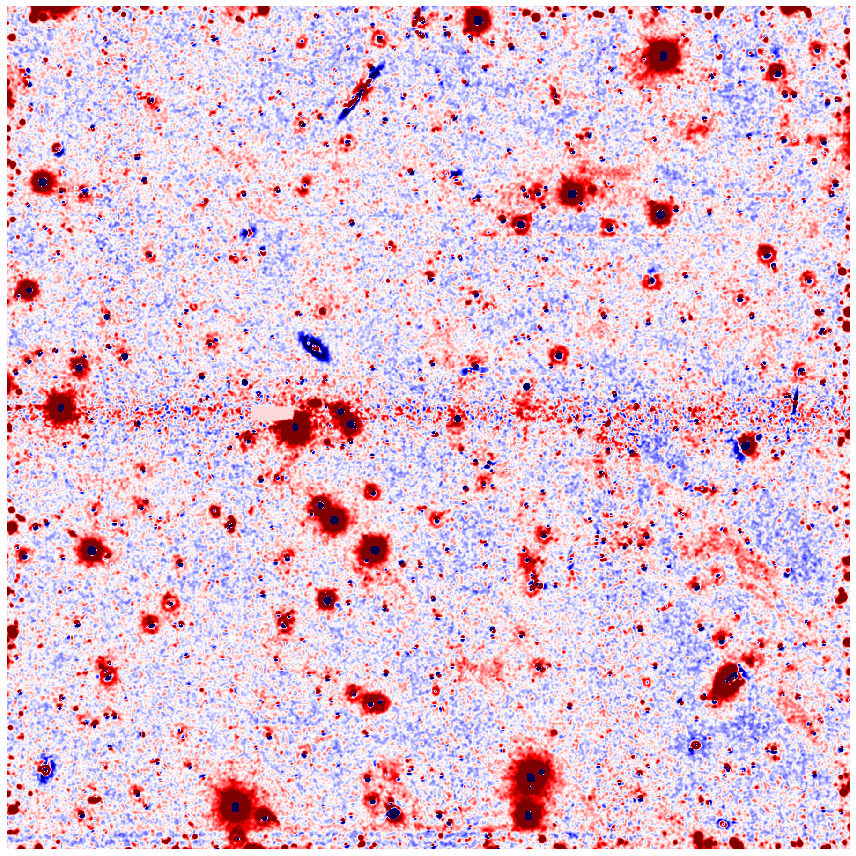

In [14]:
img = fitsio.read('/Users/rongpu/Downloads/template/dr8/legacysurvey-2655p177-image-g.fits.fz')
model = fitsio.read('/Users/rongpu/Downloads/template/dr8/legacysurvey-2655p177-model-g.fits.fz')
img = img - model

# downsize
binsize = 2
trim_size_x = img.shape[1] % binsize
trim_size_y = img.shape[0] % binsize
img = img[:(img.shape[0]-trim_size_y), :(img.shape[1]-trim_size_x)]
# to ignore NAN values, use np.nanmean
img = np.nanmean(np.nanmean(img.reshape((img.shape[0]//binsize, binsize, img.shape[1]//binsize,-1)), axis=3), axis=1)

# Gaussian filtering
img = gaussian_filter(img, 2, mode='reflect')

img += 1.5e-4

plt.figure(figsize=(12, 12))
plt.imshow(img, vmin=-0.002, vmax=0.002, cmap='seismic')
plt.axis('off')
plt.tight_layout()
plt.savefig('/Users/rongpu/Downloads/coadd/residual_g_dr8.png')
plt.show()